# Exploratory Data Analysis: Suicide Detection Dataset

## Context

This notebook presents a comprehensive exploratory data analysis (EDA) of the **Suicide and Depression Detection** dataset to be used for research on generative language models at Université d'Avignon. The research objective is to develop generative LLM models capable of simulating texts expressing various levels of psychological distress.

### Dataset Information
- **Source**: Kaggle - Suicide and Depression Detection
- **Origin**: Reddit posts collected via Pushshift API
- **Size**: ~232,000 messages
- **Labels**: `suicide` vs `non-suicide`

---

## 1. Chargement et Aperçu Initial

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Graphics configuration
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Libraries loaded successfully")

📦 Bibliothèques chargées avec succès


In [ ]:
# Loading the dataset
print("Loading dataset...\n")
df = pd.read_csv('Data/Suicide_Detection.csv')

print(f"Dataset loaded successfully!")
print(f"Dimensions: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

🔄 Chargement du dataset...

✅ Dataset chargé avec succès!
📊 Dimensions: 232,074 lignes × 3 colonnes
💾 Taille en mémoire: 227.76 MB


In [ ]:
# Preview of first rows
print("\nFirst rows preview:\n")
df.head(10)


📋 Aperçu des premières lignes:



,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
5,11,Honetly idkI dont know what im even doing here...,suicide
6,12,[Trigger warning] Excuse for self inflicted bu...,suicide
7,13,It ends tonight.I can’t do it anymore. \nI quit.,suicide
8,16,"Everyone wants to be ""edgy"" and it's making me...",non-suicide
9,18,My life is over at 20 years oldHello all. I am...,suicide


In [22]:
# Informations sur les colonnes
print("\n📝 Informations sur le dataset:\n")
df.info()


📝 Informations sur le dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  232074 non-null  int64 
 1   text        232074 non-null  object
 2   class       232074 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB


In [23]:
# Statistiques descriptives
print("\n📈 Statistiques descriptives:\n")
df.describe(include='all')


📈 Statistiques descriptives:



,Unnamed: 0,text,class
count,232074.000000,232074,232074
unique,NaN,232074,2
top,NaN,I still haven't beaten the first boss in Hollo...,suicide
freq,NaN,1,116037
mean,174152.863518,NaN,NaN
std,100500.425362,NaN,NaN
min,2.000000,NaN,NaN
25%,87049.250000,NaN,NaN
50%,174358.500000,NaN,NaN
75%,261285.750000,NaN,NaN


## 2. Analyse de la Distribution des Classes

In [24]:
# Distribution des classes
print("🎯 Distribution des classes:\n")
class_counts = df['class'].value_counts()
class_percentages = df['class'].value_counts(normalize=True) * 100

distribution_df = pd.DataFrame({
    'Classe': class_counts.index,
    'Nombre': class_counts.values,
    'Pourcentage': [f"{p:.2f}%" for p in class_percentages.values]
})

print(distribution_df.to_string(index=False))
print(f"\n⚖️ Ratio suicide/non-suicide: {class_counts['suicide'] / class_counts['non-suicide']:.3f}")

🎯 Distribution des classes:

     Classe  Nombre Pourcentage
    suicide  116037      50.00%
non-suicide  116037      50.00%

⚖️ Ratio suicide/non-suicide: 1.000


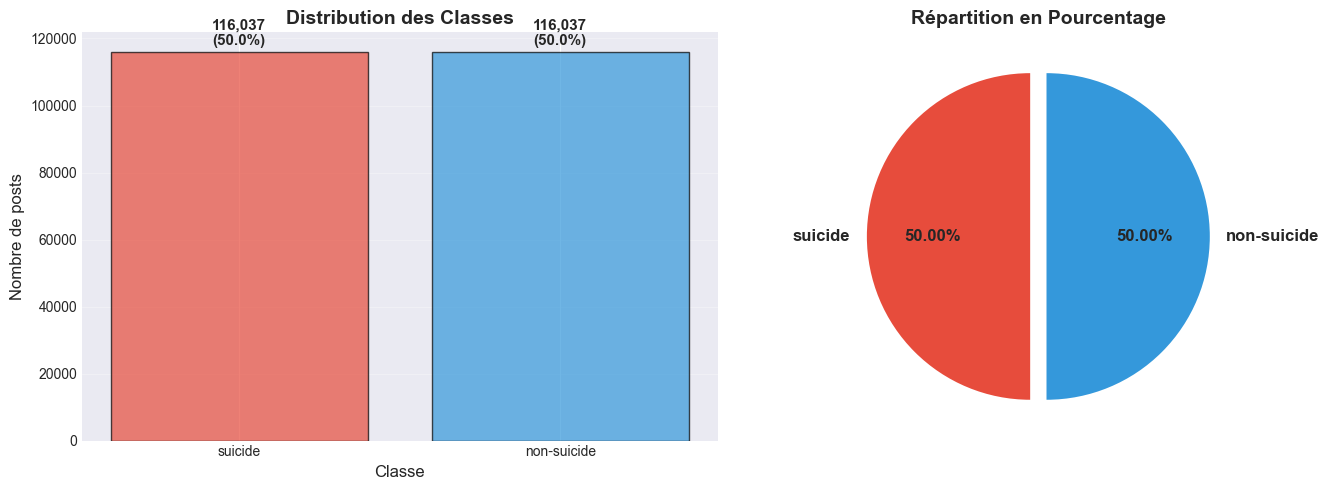


✅ Graphique sauvegardé: visuals/eda_class_distribution_fr.png


In [25]:
# Visualisation de la distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Graphique à barres
colors = ['#e74c3c', '#3498db']  # Rouge pour suicide, bleu pour non-suicide
axes[0].bar(class_counts.index, class_counts.values, color=colors, alpha=0.7, edgecolor='black')
axes[0].set_title('Distribution des Classes', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Classe', fontsize=12)
axes[0].set_ylabel('Nombre de posts', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# Ajout des valeurs sur les barres
for i, (label, count) in enumerate(class_counts.items()):
    axes[0].text(i, count + 1000, f'{count:,}\n({class_percentages[label]:.1f}%)', 
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Graphique circulaire
axes[1].pie(class_counts.values, labels=class_counts.index, autopct='%1.2f%%',
           colors=colors, startangle=90, explode=[0.05, 0.05],
           textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Répartition en Pourcentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('visuals/eda_class_distribution_fr.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Graphique sauvegardé: visuals/eda_class_distribution_fr.png")

## 3. Analyse de la Longueur des Textes

In [26]:
# Calcul de la longueur des textes
df['text_length'] = df['text'].str.len()
df['word_count'] = df['text'].str.split().str.len()

print("📏 Statistiques de longueur des textes:\n")

# Statistiques globales
print("=" * 60)
print("STATISTIQUES GLOBALES")
print("=" * 60)
print(f"Longueur moyenne (caractères): {df['text_length'].mean():.0f}")
print(f"Longueur médiane (caractères): {df['text_length'].median():.0f}")
print(f"Longueur min/max (caractères): {df['text_length'].min()} / {df['text_length'].max():,}")
print(f"\nNombre moyen de mots: {df['word_count'].mean():.0f}")
print(f"Nombre médian de mots: {df['word_count'].median():.0f}")
print(f"Nombre min/max de mots: {df['word_count'].min()} / {df['word_count'].max():,}")

# Statistiques par classe
print("\n" + "=" * 60)
print("STATISTIQUES PAR CLASSE")
print("=" * 60)

for class_name in df['class'].unique():
    class_data = df[df['class'] == class_name]
    print(f"\n🔹 Classe: {class_name.upper()}")
    print(f"   Longueur moyenne: {class_data['text_length'].mean():.0f} caractères")
    print(f"   Nombre moyen de mots: {class_data['word_count'].mean():.0f}")
    print(f"   Médiane (caractères): {class_data['text_length'].median():.0f}")
    print(f"   Écart-type: {class_data['text_length'].std():.0f}")

📏 Statistiques de longueur des textes:

STATISTIQUES GLOBALES
Longueur moyenne (caractères): 690
Longueur médiane (caractères): 315
Longueur min/max (caractères): 3 / 40,297

Nombre moyen de mots: 132
Nombre médian de mots: 60
Nombre min/max de mots: 1 / 9,684

STATISTIQUES PAR CLASSE

🔹 Classe: SUICIDE
   Longueur moyenne: 1050 caractères
   Nombre moyen de mots: 203
   Médiane (caractères): 653
   Écart-type: 1328

🔹 Classe: NON-SUICIDE
   Longueur moyenne: 329 caractères
   Nombre moyen de mots: 61
   Médiane (caractères): 165
   Écart-type: 806


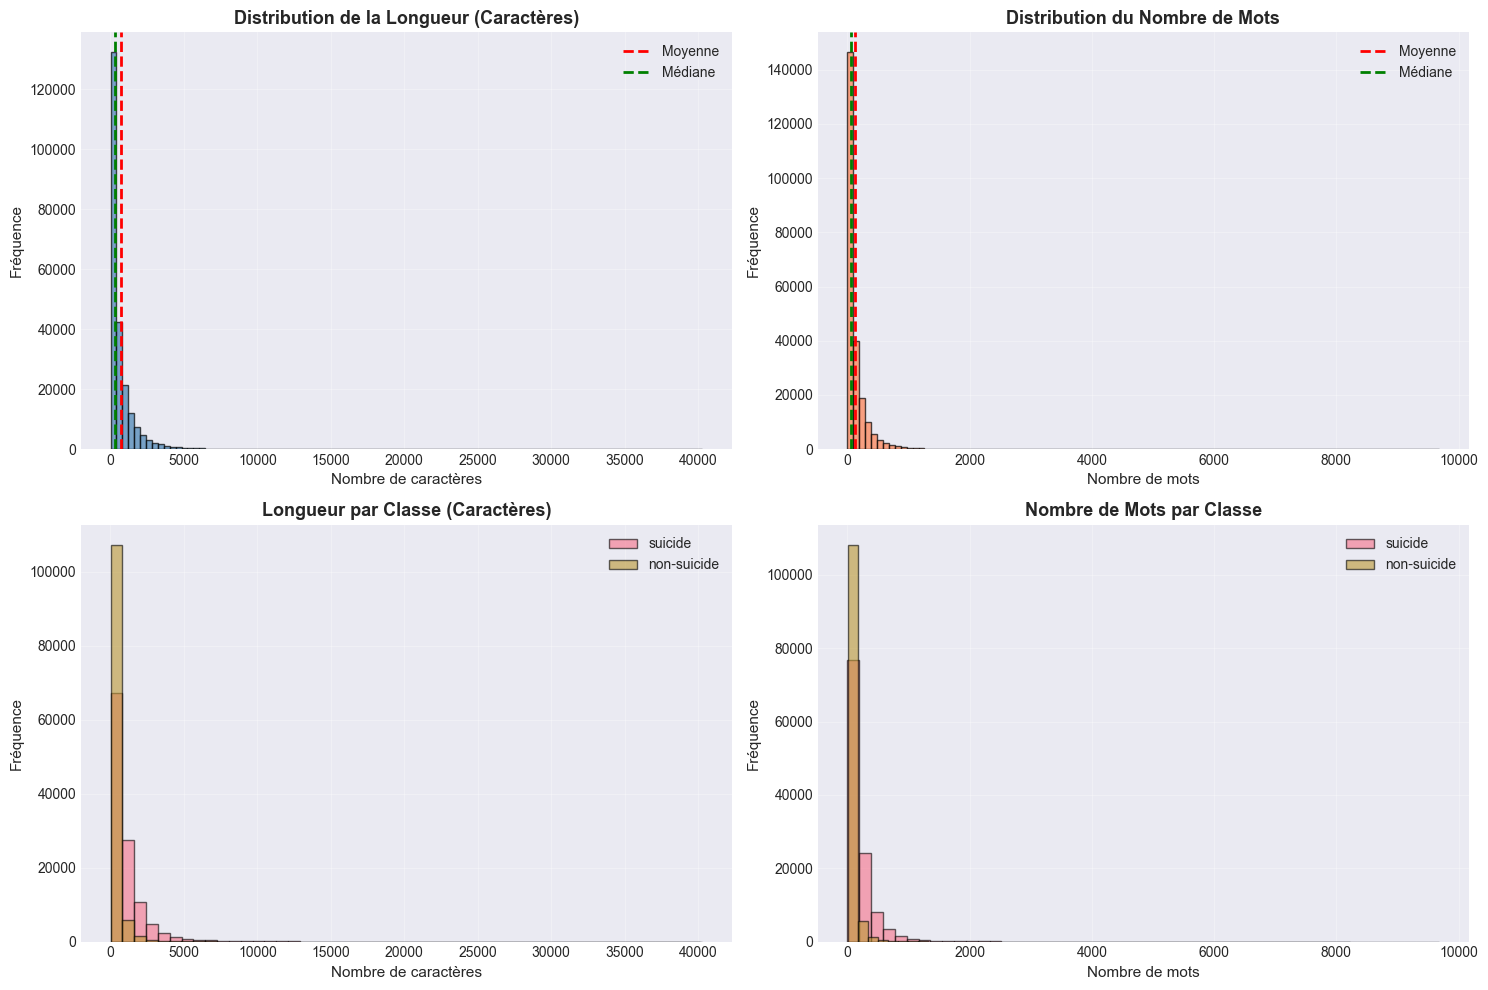


✅ Graphique sauvegardé: visuals/eda_text_length_distribution_fr.png


In [27]:
# Visualisation de la distribution des longueurs
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution globale - Caractères
axes[0, 0].hist(df['text_length'], bins=100, color='steelblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Distribution de la Longueur (Caractères)', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Nombre de caractères', fontsize=11)
axes[0, 0].set_ylabel('Fréquence', fontsize=11)
axes[0, 0].axvline(df['text_length'].mean(), color='red', linestyle='--', linewidth=2, label='Moyenne')
axes[0, 0].axvline(df['text_length'].median(), color='green', linestyle='--', linewidth=2, label='Médiane')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Distribution globale - Mots
axes[0, 1].hist(df['word_count'], bins=100, color='coral', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Distribution du Nombre de Mots', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Nombre de mots', fontsize=11)
axes[0, 1].set_ylabel('Fréquence', fontsize=11)
axes[0, 1].axvline(df['word_count'].mean(), color='red', linestyle='--', linewidth=2, label='Moyenne')
axes[0, 1].axvline(df['word_count'].median(), color='green', linestyle='--', linewidth=2, label='Médiane')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Comparaison par classe - Caractères
for class_name in df['class'].unique():
    class_data = df[df['class'] == class_name]['text_length']
    axes[1, 0].hist(class_data, bins=50, alpha=0.6, label=class_name, edgecolor='black')

axes[1, 0].set_title('Longueur par Classe (Caractères)', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Nombre de caractères', fontsize=11)
axes[1, 0].set_ylabel('Fréquence', fontsize=11)
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Comparaison par classe - Mots
for class_name in df['class'].unique():
    class_data = df[df['class'] == class_name]['word_count']
    axes[1, 1].hist(class_data, bins=50, alpha=0.6, label=class_name, edgecolor='black')

axes[1, 1].set_title('Nombre de Mots par Classe', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Nombre de mots', fontsize=11)
axes[1, 1].set_ylabel('Fréquence', fontsize=11)
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('visuals/eda_text_length_distribution_fr.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Graphique sauvegardé: visuals/eda_text_length_distribution_fr.png")

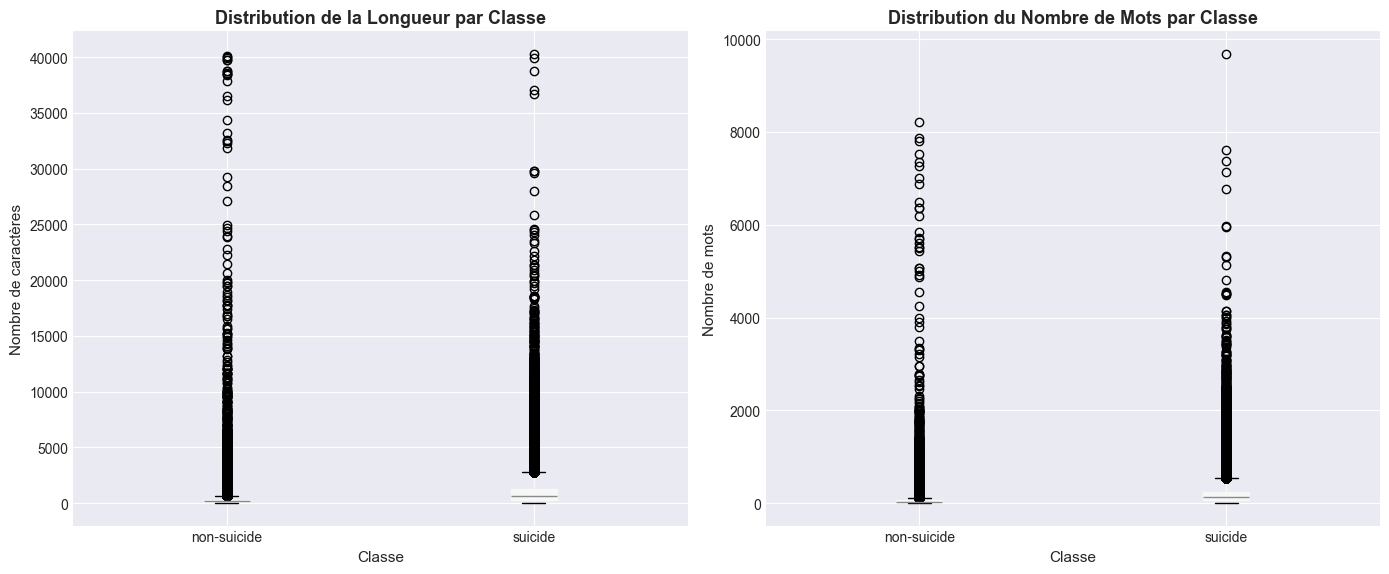


✅ Graphique sauvegardé: visuals/eda_boxplot_comparison_fr.png


In [28]:
# Box plot comparatif
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box plot - Caractères
df.boxplot(column='text_length', by='class', ax=axes[0], patch_artist=True)
axes[0].set_title('Distribution de la Longueur par Classe', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Classe', fontsize=11)
axes[0].set_ylabel('Nombre de caractères', fontsize=11)
plt.sca(axes[0])
plt.xticks(rotation=0)

# Box plot - Mots
df.boxplot(column='word_count', by='class', ax=axes[1], patch_artist=True)
axes[1].set_title('Distribution du Nombre de Mots par Classe', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Classe', fontsize=11)
axes[1].set_ylabel('Nombre de mots', fontsize=11)
plt.sca(axes[1])
plt.xticks(rotation=0)

plt.suptitle('')  # Supprimer le titre automatique de pandas
plt.tight_layout()
plt.savefig('visuals/eda_boxplot_comparison_fr.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Graphique sauvegardé: visuals/eda_boxplot_comparison_fr.png")

## 4. Analyse Textuelle Avancée

In [29]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Télécharger les ressources NLTK si nécessaire
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
    nltk.download('stopwords')

print("✅ Ressources NLTK prêtes")

✅ Ressources NLTK prêtes


In [30]:
# Fonction pour nettoyer et analyser le texte
def analyze_text_patterns(text):
    """Analyse les patterns dans le texte"""
    patterns = {
        'urls': len(re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text)),
        'mentions': len(re.findall(r'@\w+', text)),
        'hashtags': len(re.findall(r'#\w+', text)),
        'exclamations': text.count('!'),
        'questions': text.count('?'),
        'uppercase_words': len(re.findall(r'\b[A-Z]{2,}\b', text)),
        'numbers': len(re.findall(r'\b\d+\b', text)),
        'ellipsis': text.count('...')
    }
    return patterns

# Analyser un échantillon (pour la rapidité)
print("🔍 Analyse des patterns textuels (sur 10,000 échantillons)...\n")
sample_df = df.sample(n=min(10000, len(df)), random_state=42)

pattern_results = sample_df['text'].apply(analyze_text_patterns)
pattern_df = pd.DataFrame(pattern_results.tolist())
pattern_df['class'] = sample_df['class'].values

print("📊 Moyennes des patterns par classe:\n")
pattern_summary = pattern_df.groupby('class').mean()
print(pattern_summary.round(2))

🔍 Analyse des patterns textuels (sur 10,000 échantillons)...

📊 Moyennes des patterns par classe:

             urls  mentions  hashtags  exclamations  questions  \
class                                                            
non-suicide  0.05       0.0      0.04          0.45       0.55   
suicide      0.01       0.0      0.04          0.13       0.81   

             uppercase_words  numbers  ellipsis  
class                                            
non-suicide             0.87     1.04      0.31  
suicide                 0.83     1.22      0.45  


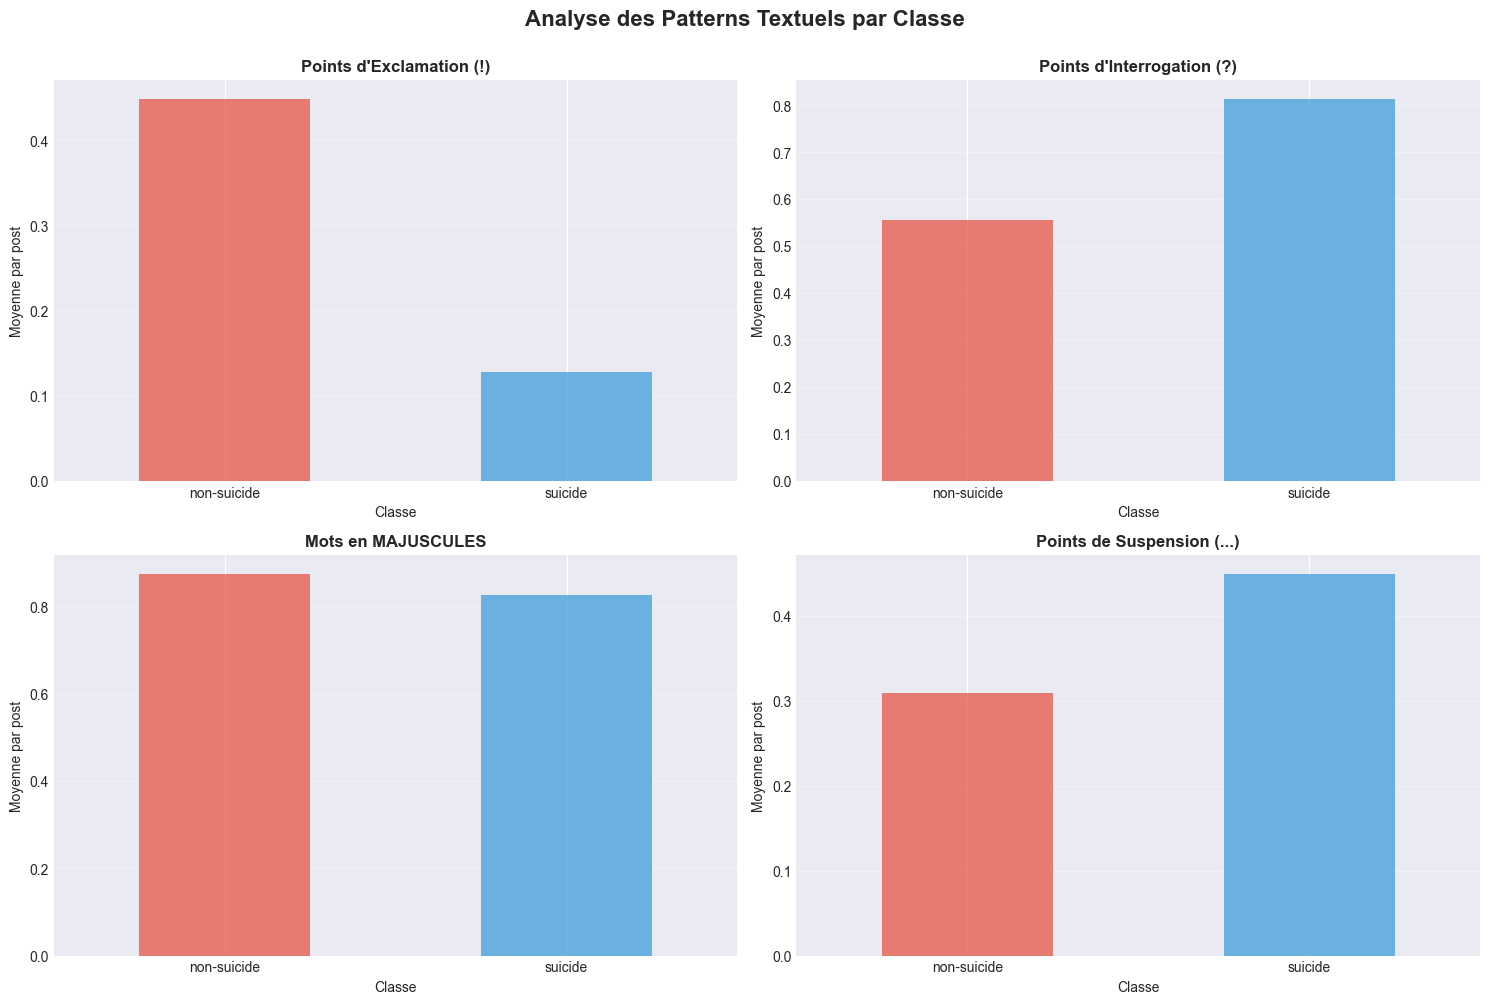


✅ Graphique sauvegardé: visuals/eda_text_patterns_fr.png


In [31]:
# Visualisation des patterns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Analyse des Patterns Textuels par Classe', fontsize=16, fontweight='bold', y=1.00)

patterns_to_plot = ['exclamations', 'questions', 'uppercase_words', 'ellipsis']
titles = ['Points d\'Exclamation (!)', 'Points d\'Interrogation (?)', 
          'Mots en MAJUSCULES', 'Points de Suspension (...)']

for idx, (pattern, title) in enumerate(zip(patterns_to_plot, titles)):
    row, col = idx // 2, idx % 2
    
    pattern_df.groupby('class')[pattern].mean().plot(kind='bar', ax=axes[row, col], 
                                                       color=['#e74c3c', '#3498db'], alpha=0.7)
    axes[row, col].set_title(title, fontsize=12, fontweight='bold')
    axes[row, col].set_xlabel('Classe', fontsize=10)
    axes[row, col].set_ylabel('Moyenne par post', fontsize=10)
    axes[row, col].tick_params(axis='x', rotation=0)
    axes[row, col].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('visuals/eda_text_patterns_fr.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Graphique sauvegardé: visuals/eda_text_patterns_fr.png")

## 5. Analyse des Mots les Plus Fréquents

In [32]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
from wordcloud import WordCloud

# Préparation des textes par classe
def prepare_text_for_wordcloud(texts):
    """Prépare le texte pour le nuage de mots"""
    all_text = ' '.join(texts.astype(str))
    # Nettoyage basique
    all_text = all_text.lower()
    all_text = re.sub(r'http\S+', '', all_text)  # Supprimer URLs
    all_text = re.sub(r'[^a-zA-Z\s]', '', all_text)  # Garder uniquement lettres
    return all_text

print("☁️ Génération des nuages de mots (cela peut prendre quelques minutes)...\n")

☁️ Génération des nuages de mots (cela peut prendre quelques minutes)...



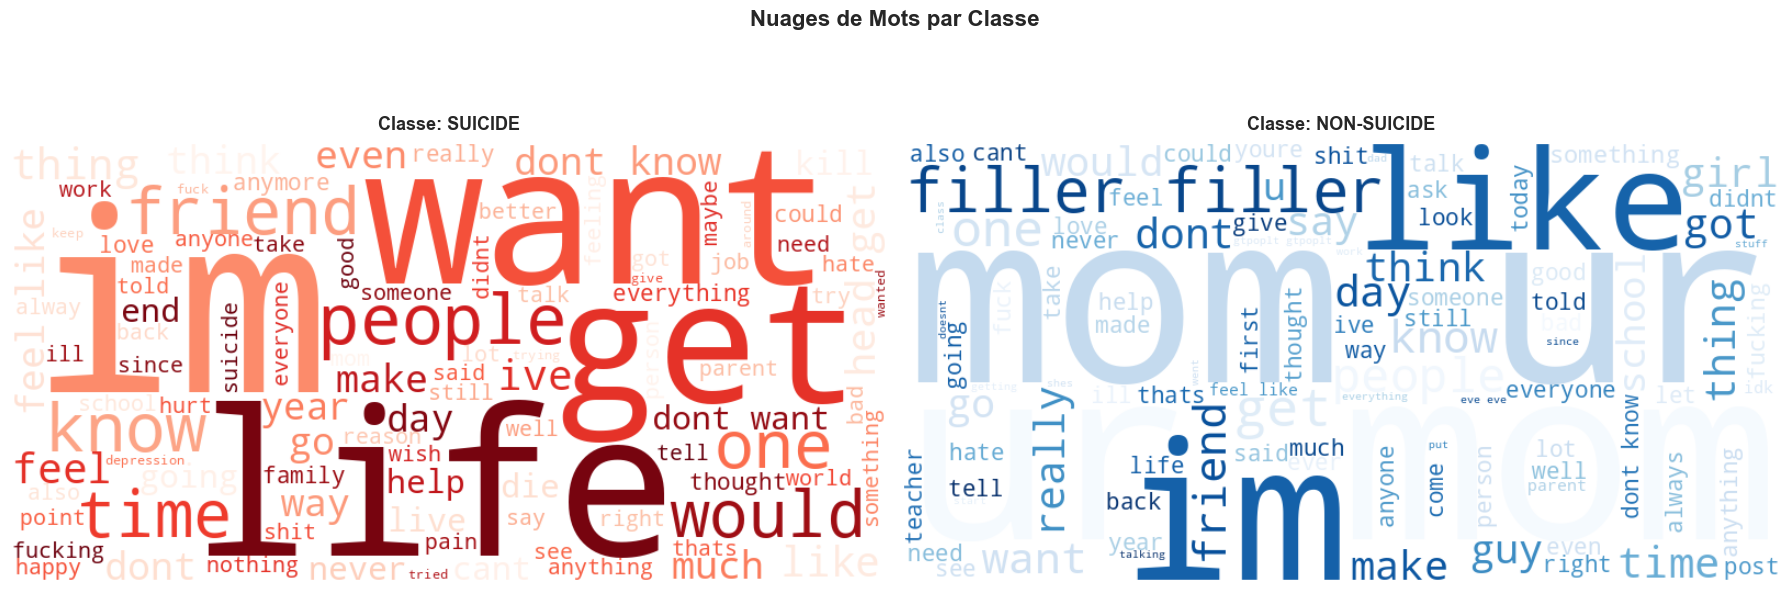

✅ Graphique sauvegardé: visuals/eda_wordclouds_fr.png


In [34]:
# Nuages de mots par classe
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Nuages de Mots par Classe', fontsize=16, fontweight='bold', y=0.98)

stop_words = set(stopwords.words('english'))
colors = ['Reds', 'Blues']

for idx, class_name in enumerate(df['class'].unique()):
    # Prendre un échantillon pour accélérer
    class_texts = df[df['class'] == class_name]['text'].sample(n=min(5000, len(df[df['class'] == class_name])), 
                                                                 random_state=42)
    text = prepare_text_for_wordcloud(class_texts)
    
    wordcloud = WordCloud(width=800, height=400, 
                         background_color='white',
                         stopwords=stop_words,
                         max_words=100,
                         colormap=colors[idx],
                         relative_scaling=0.5,
                         min_font_size=10).generate(text)
    
    axes[idx].imshow(wordcloud, interpolation='bilinear')
    axes[idx].axis('off')
    axes[idx].set_title(f'Classe: {class_name.upper()}', fontsize=13, fontweight='bold', pad=10)

plt.tight_layout()
plt.savefig('visuals/eda_wordclouds_fr.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Graphique sauvegardé: visuals/eda_wordclouds_fr.png")

In [35]:
# Top mots par classe (sans stop words)
def get_top_words(texts, n=20):
    """Obtient les mots les plus fréquents"""
    all_words = []
    stop_words = set(stopwords.words('english'))
    
    for text in texts:
        # Nettoyage
        text = str(text).lower()
        text = re.sub(r'http\S+', '', text)
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        words = text.split()
        # Filtrer stop words et mots courts
        words = [w for w in words if w not in stop_words and len(w) > 2]
        all_words.extend(words)
    
    return Counter(all_words).most_common(n)

print("🔤 Calcul des mots les plus fréquents par classe...\n")

for class_name in df['class'].unique():
    print(f"\n{'='*60}")
    print(f"TOP 20 MOTS - CLASSE: {class_name.upper()}")
    print(f"{'='*60}\n")
    
    class_texts = df[df['class'] == class_name]['text'].sample(n=min(10000, len(df[df['class'] == class_name])), 
                                                                 random_state=42)
    top_words = get_top_words(class_texts, n=20)
    
    for rank, (word, count) in enumerate(top_words, 1):
        print(f"{rank:2d}. {word:20s} : {count:6,} occurrences")

🔤 Calcul des mots les plus fréquents par classe...


TOP 20 MOTS - CLASSE: SUICIDE

 1. dont                 : 15,363 occurrences
 2. like                 : 11,201 occurrences
 3. want                 : 10,789 occurrences
 4. know                 :  9,129 occurrences
 5. life                 :  9,082 occurrences
 6. feel                 :  9,033 occurrences
 7. get                  :  8,970 occurrences
 8. ive                  :  8,127 occurrences
 9. cant                 :  7,421 occurrences
10. even                 :  6,506 occurrences
11. people               :  5,909 occurrences
12. time                 :  5,889 occurrences
13. would                :  5,705 occurrences
14. one                  :  5,688 occurrences
15. really               :  5,440 occurrences
16. think                :  4,818 occurrences
17. going                :  4,781 occurrences
18. never                :  4,735 occurrences
19. much                 :  4,171 occurrences
20. friends              :  4,009 occurren

## 5.5. Analyse de Sentiment et Polarité

In [39]:
!pip install textblob vaderSentiment

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   -------------------------------------- 624.3/624.3 kB 373.7 kB/s eta 0:00:00


In [41]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
vader_analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    """Analyze sentiment using VADER and TextBlob"""
    # VADER analysis (better for social media)
    vader_scores = vader_analyzer.polarity_scores(str(text))
    
    # TextBlob analysis
    blob = TextBlob(str(text))
    
    return {
        'vader_compound': vader_scores['compound'],
        'vader_pos': vader_scores['pos'],
        'vader_neg': vader_scores['neg'],
        'vader_neu': vader_scores['neu'],
        'textblob_polarity': blob.sentiment.polarity,
        'textblob_subjectivity': blob.sentiment.subjectivity
    }

print("Sentiment analysis on sample (10,000 texts)...\n")
sentiment_sample = df.sample(n=min(10000, len(df)), random_state=42)

sentiment_results = sentiment_sample['text'].apply(analyze_sentiment)
sentiment_df = pd.DataFrame(sentiment_results.tolist())
sentiment_df['class'] = sentiment_sample['class'].values

print("Average sentiment scores by class:\n")
sentiment_summary = sentiment_df.groupby('class').mean()
print(sentiment_summary.round(3))

Sentiment analysis on sample (10,000 texts)...

Average sentiment scores by class:

             vader_compound  vader_pos  vader_neg  vader_neu  \
class                                                          
non-suicide           0.107      0.133      0.102      0.765   
suicide              -0.425      0.110      0.168      0.721   

             textblob_polarity  textblob_subjectivity  
class                                                  
non-suicide              0.039                  0.492  
suicide                 -0.004                  0.513  


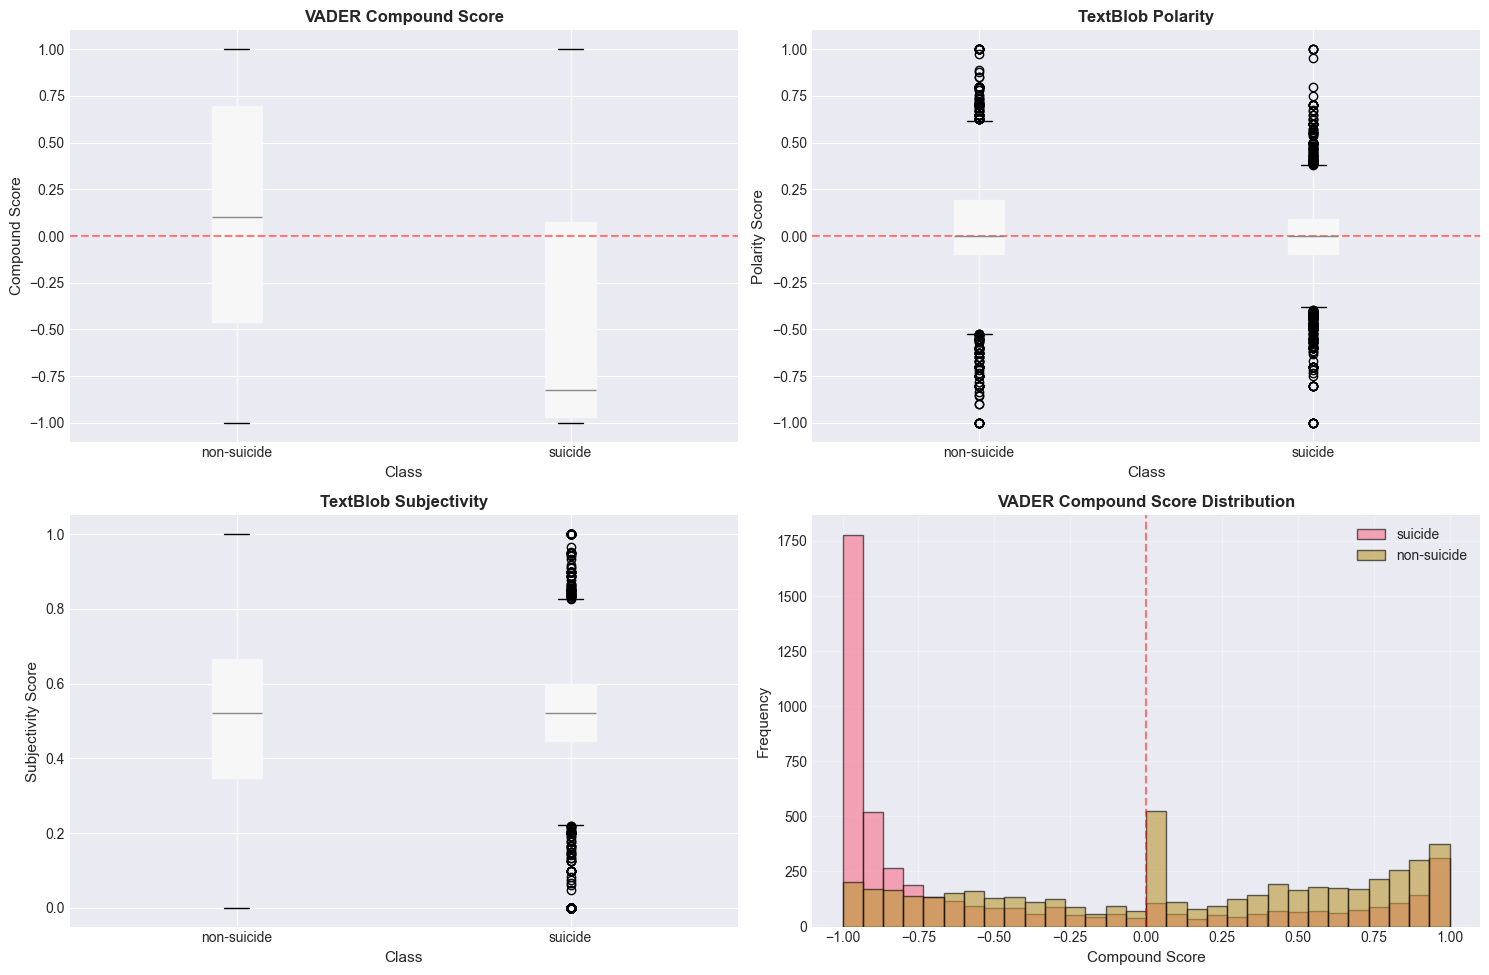


Graph saved: visuals/eda_sentiment_analysis_fr.png


In [42]:
# Visualization of sentiment analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Sentiment and Polarity Analysis by Class', fontsize=16, fontweight='bold', y=0.995)

# VADER Compound Score
sentiment_df.boxplot(column='vader_compound', by='class', ax=axes[0, 0], patch_artist=True)
axes[0, 0].set_title('VADER Compound Score', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Class', fontsize=11)
axes[0, 0].set_ylabel('Compound Score', fontsize=11)
axes[0, 0].axhline(y=0, color='red', linestyle='--', alpha=0.5)

# TextBlob Polarity
sentiment_df.boxplot(column='textblob_polarity', by='class', ax=axes[0, 1], patch_artist=True)
axes[0, 1].set_title('TextBlob Polarity', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Class', fontsize=11)
axes[0, 1].set_ylabel('Polarity Score', fontsize=11)
axes[0, 1].axhline(y=0, color='red', linestyle='--', alpha=0.5)

# TextBlob Subjectivity
sentiment_df.boxplot(column='textblob_subjectivity', by='class', ax=axes[1, 0], patch_artist=True)
axes[1, 0].set_title('TextBlob Subjectivity', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Class', fontsize=11)
axes[1, 0].set_ylabel('Subjectivity Score', fontsize=11)

# Distribution comparison
for class_name in sentiment_df['class'].unique():
    class_data = sentiment_df[sentiment_df['class'] == class_name]['vader_compound']
    axes[1, 1].hist(class_data, bins=30, alpha=0.6, label=class_name, edgecolor='black')

axes[1, 1].set_title('VADER Compound Score Distribution', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Compound Score', fontsize=11)
axes[1, 1].set_ylabel('Frequency', fontsize=11)
axes[1, 1].legend()
axes[1, 1].axvline(x=0, color='red', linestyle='--', alpha=0.5)
axes[1, 1].grid(alpha=0.3)

plt.suptitle('')
plt.tight_layout()
plt.savefig('visuals/eda_sentiment_analysis_fr.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nGraph saved: visuals/eda_sentiment_analysis_fr.png")

## 5.6. Lexical Diversity Analysis

In [43]:
def calculate_lexical_diversity(text):
    """Calculate lexical diversity metrics"""
    text = str(text).lower()
    # Remove URLs and special characters
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = text.split()
    
    if len(words) == 0:
        return {'ttr': 0, 'hapax_ratio': 0, 'unique_words': 0, 'total_words': 0}
    
    unique_words = set(words)
    word_freq = Counter(words)
    hapax_legomena = [word for word, count in word_freq.items() if count == 1]
    
    # Type-Token Ratio (TTR)
    ttr = len(unique_words) / len(words) if len(words) > 0 else 0
    
    # Hapax Legomena Ratio
    hapax_ratio = len(hapax_legomena) / len(words) if len(words) > 0 else 0
    
    return {
        'ttr': ttr,
        'hapax_ratio': hapax_ratio,
        'unique_words': len(unique_words),
        'total_words': len(words)
    }

print("Calculating lexical diversity (sample of 10,000 texts)...\n")
diversity_sample = df.sample(n=min(10000, len(df)), random_state=42)

diversity_results = diversity_sample['text'].apply(calculate_lexical_diversity)
diversity_df = pd.DataFrame(diversity_results.tolist())
diversity_df['class'] = diversity_sample['class'].values

print("=" * 60)
print("LEXICAL DIVERSITY BY CLASS")
print("=" * 60)
diversity_summary = diversity_df.groupby('class').mean()
print(diversity_summary.round(3))

print("\n" + "=" * 60)
print("INTERPRETATION")
print("=" * 60)
print("TTR (Type-Token Ratio): Proportion of unique words (higher = more diverse)")
print("Hapax Ratio: Proportion of words appearing only once (higher = richer vocabulary)")
print("Unique Words: Average number of different words per text")

Calculating lexical diversity (sample of 10,000 texts)...

LEXICAL DIVERSITY BY CLASS
               ttr  hapax_ratio  unique_words  total_words
class                                                     
non-suicide  0.811        0.695        38.341       58.651
suicide      0.666        0.517       106.307      202.680

INTERPRETATION
TTR (Type-Token Ratio): Proportion of unique words (higher = more diverse)
Hapax Ratio: Proportion of words appearing only once (higher = richer vocabulary)
Unique Words: Average number of different words per text


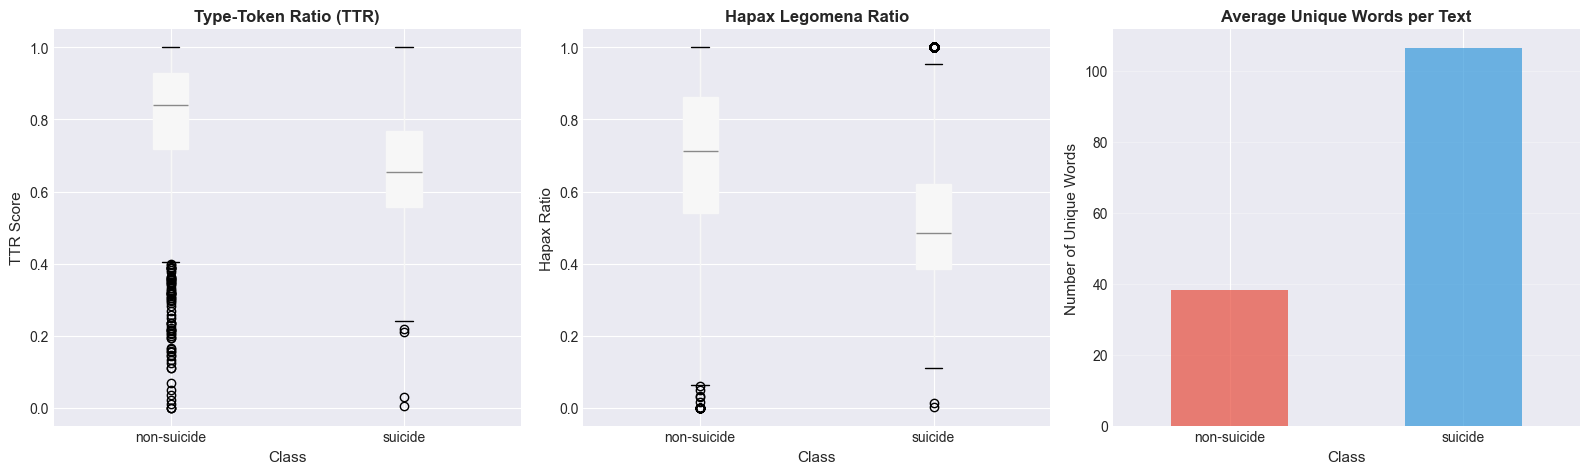


Graph saved: visuals/eda_lexical_diversity_fr.png


In [44]:
# Visualization of lexical diversity
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('Lexical Diversity Analysis by Class', fontsize=16, fontweight='bold')

# Type-Token Ratio
diversity_df.boxplot(column='ttr', by='class', ax=axes[0], patch_artist=True)
axes[0].set_title('Type-Token Ratio (TTR)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Class', fontsize=11)
axes[0].set_ylabel('TTR Score', fontsize=11)

# Hapax Legomena Ratio
diversity_df.boxplot(column='hapax_ratio', by='class', ax=axes[1], patch_artist=True)
axes[1].set_title('Hapax Legomena Ratio', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Class', fontsize=11)
axes[1].set_ylabel('Hapax Ratio', fontsize=11)

# Unique Words Count
diversity_df.groupby('class')['unique_words'].mean().plot(kind='bar', ax=axes[2], 
                                                           color=['#e74c3c', '#3498db'], alpha=0.7)
axes[2].set_title('Average Unique Words per Text', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Class', fontsize=11)
axes[2].set_ylabel('Number of Unique Words', fontsize=11)
axes[2].tick_params(axis='x', rotation=0)
axes[2].grid(axis='y', alpha=0.3)

plt.suptitle('')
plt.tight_layout()
plt.savefig('visuals/eda_lexical_diversity_fr.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nGraph saved: visuals/eda_lexical_diversity_fr.png")

## 5.7. N-grams Analysis

In [45]:
from nltk import ngrams

def get_top_ngrams(texts, n=2, top_k=15):
    """Extract top n-grams from texts"""
    stop_words = set(stopwords.words('english'))
    all_ngrams = []
    
    for text in texts:
        # Clean text
        text = str(text).lower()
        text = re.sub(r'http\S+', '', text)
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        words = text.split()
        # Filter stop words
        words = [w for w in words if w not in stop_words and len(w) > 2]
        
        # Generate n-grams
        text_ngrams = list(ngrams(words, n))
        all_ngrams.extend(text_ngrams)
    
    # Count and return top k
    ngram_freq = Counter(all_ngrams)
    return ngram_freq.most_common(top_k)

print("N-grams Analysis (sample of 10,000 texts per class)...\n")

for class_name in df['class'].unique():
    print("=" * 70)
    print(f"CLASS: {class_name.upper()}")
    print("=" * 70)
    
    class_texts = df[df['class'] == class_name]['text'].sample(
        n=min(10000, len(df[df['class'] == class_name])), 
        random_state=42
    )
    
    # Bigrams
    print(f"\nTOP 15 BIGRAMS:")
    print("-" * 70)
    bigrams = get_top_ngrams(class_texts, n=2, top_k=15)
    for rank, (bigram, count) in enumerate(bigrams, 1):
        print(f"{rank:2d}. {' '.join(bigram):30s} : {count:5,} occurrences")
    
    # Trigrams
    print(f"\nTOP 15 TRIGRAMS:")
    print("-" * 70)
    trigrams = get_top_ngrams(class_texts, n=3, top_k=15)
    for rank, (trigram, count) in enumerate(trigrams, 1):
        print(f"{rank:2d}. {' '.join(trigram):40s} : {count:5,} occurrences")
    
    print("\n")

N-grams Analysis (sample of 10,000 texts per class)...

CLASS: SUICIDE

TOP 15 BIGRAMS:
----------------------------------------------------------------------
 1. dont know                      : 3,597 occurrences
 2. feel like                      : 3,419 occurrences
 3. dont want                      : 3,006 occurrences
 4. get head                       : 1,952 occurrences
 5. head get                       : 1,941 occurrences
 6. want die                       : 1,056 occurrences
 7. dont think                     :   852 occurrences
 8. dont even                      :   786 occurrences
 9. every day                      :   681 occurrences
10. get better                     :   672 occurrences
11. cant even                      :   577 occurrences
12. feels like                     :   574 occurrences
13. suicidal thoughts              :   527 occurrences
14. high school                    :   507 occurrences
15. ive tried                      :   507 occurrences

TOP 15 TRIGRAMS

## 5.8. Readability Analysis

In [46]:
!pip install textstat

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.1 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.1 MB ? eta -:--:--
   ---------- ----------------------------- 0.5/2.1 MB 762.0 kB/s eta 0:00:03
   --------------- ------------------------ 0.8/2.1 MB 780.2 kB/s eta 0:00:02
   --------------- ------------------------ 0.8/2.1 MB 780.2 kB/s eta 0:00:02
   -------------------- ------------------- 1.0/2.1 MB 774.0 kB/s eta 0:00:02
   ------------------------- -------------- 1.3/2.1 MB 780.2 kB/s eta 0:00:01
   ------------------------- -------------- 1.3/2.1 MB 780.2 kB/s eta 0:00:01
   ------------------------------ --------- 1.6/2.1 MB 776.5 kB/s eta 0:00:01
   ------------------------------ --------- 1.6/2.1 MB 776.5 kB/s eta 0:00:01
   -------------------


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
import textstat

def calculate_readability(text):
    """Calculate multiple readability scores"""
    text = str(text)
    
    return {
        'flesch_reading_ease': textstat.flesch_reading_ease(text),
        'flesch_kincaid_grade': textstat.flesch_kincaid_grade(text),
        'gunning_fog': textstat.gunning_fog(text),
        'automated_readability_index': textstat.automated_readability_index(text),
        'smog_index': textstat.smog_index(text),
        'avg_sentence_length': textstat.avg_sentence_length(text),
        'avg_syllables_per_word': textstat.avg_syllables_per_word(text)
    }

print("Calculating readability scores (sample of 10,000 texts)...\n")
readability_sample = df.sample(n=min(10000, len(df)), random_state=42)

readability_results = readability_sample['text'].apply(calculate_readability)
readability_df = pd.DataFrame(readability_results.tolist())
readability_df['class'] = readability_sample['class'].values

print("=" * 70)
print("READABILITY SCORES BY CLASS")
print("=" * 70)
readability_summary = readability_df.groupby('class').mean()
print(readability_summary.round(2))

print("\n" + "=" * 70)
print("INTERPRETATION")
print("=" * 70)
print("Flesch Reading Ease: 90-100 (Very Easy), 60-70 (Standard), 0-30 (Very Difficult)")
print("Flesch-Kincaid Grade: US school grade level required to understand text")
print("Gunning Fog: Years of education needed to understand text")
print("SMOG Index: Years of education needed (conservative estimate)")
print("Lower scores = More accessible text")

Calculating readability scores (sample of 10,000 texts)...

READABILITY SCORES BY CLASS
             flesch_reading_ease  flesch_kincaid_grade  gunning_fog  \
class                                                                 
non-suicide                64.81                  9.18        10.12   
suicide                    73.90                  7.41         9.37   

             automated_readability_index  smog_index  avg_sentence_length  \
class                                                                       
non-suicide                        13.05        8.40                19.97   
suicide                             7.67        8.96                17.96   

             avg_syllables_per_word  
class                                
non-suicide                    1.44  
suicide                        1.36  

INTERPRETATION
Flesch Reading Ease: 90-100 (Very Easy), 60-70 (Standard), 0-30 (Very Difficult)
Flesch-Kincaid Grade: US school grade level required to understand te

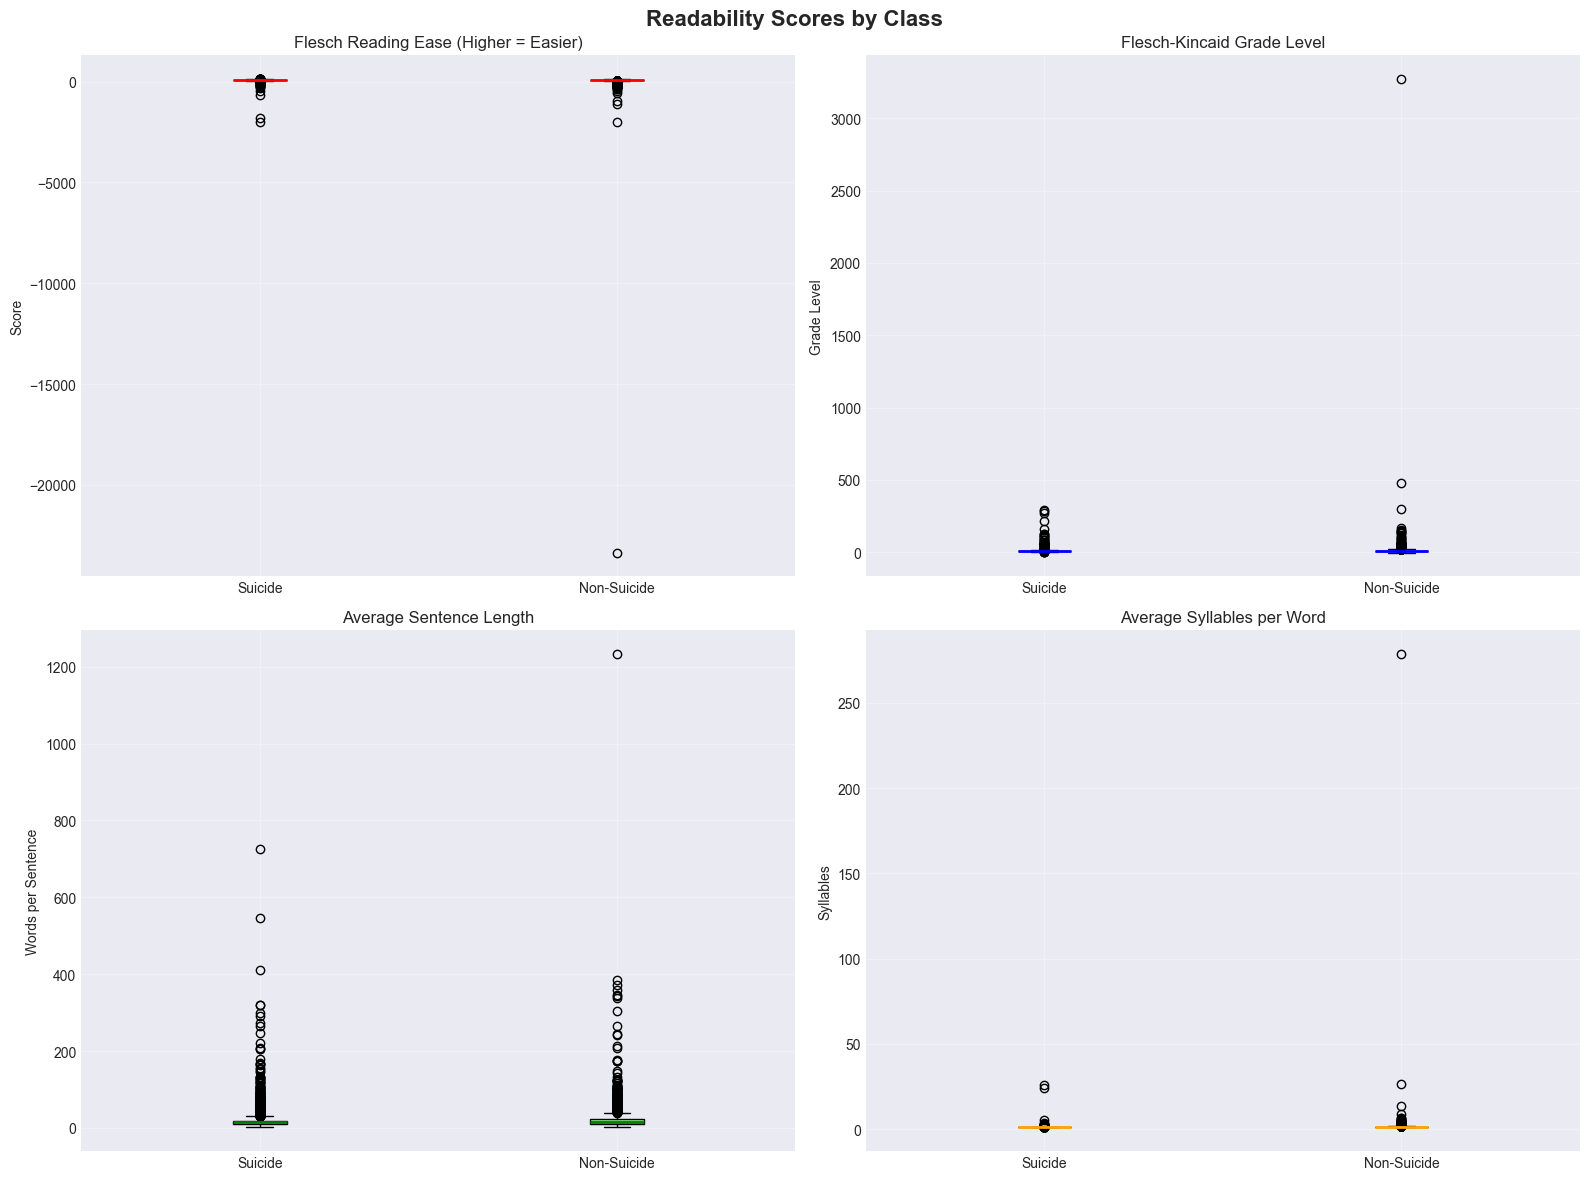


Visualization saved as 'visuals/eda_readability_fr.png'


In [48]:
# Visualize readability scores
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Readability Scores by Class", fontsize=16, fontweight='bold')

# 1. Flesch Reading Ease (higher = easier)
axes[0, 0].boxplot([readability_df[readability_df['class'] == 'suicide']['flesch_reading_ease'],
                     readability_df[readability_df['class'] == 'non-suicide']['flesch_reading_ease']],
                    labels=['Suicide', 'Non-Suicide'], patch_artist=True,
                    boxprops=dict(facecolor='lightcoral'),
                    medianprops=dict(color='red', linewidth=2))
axes[0, 0].set_title("Flesch Reading Ease (Higher = Easier)")
axes[0, 0].set_ylabel("Score")
axes[0, 0].grid(True, alpha=0.3)

# 2. Flesch-Kincaid Grade Level
axes[0, 1].boxplot([readability_df[readability_df['class'] == 'suicide']['flesch_kincaid_grade'],
                     readability_df[readability_df['class'] == 'non-suicide']['flesch_kincaid_grade']],
                    labels=['Suicide', 'Non-Suicide'], patch_artist=True,
                    boxprops=dict(facecolor='lightblue'),
                    medianprops=dict(color='blue', linewidth=2))
axes[0, 1].set_title("Flesch-Kincaid Grade Level")
axes[0, 1].set_ylabel("Grade Level")
axes[0, 1].grid(True, alpha=0.3)

# 3. Average Sentence Length
axes[1, 0].boxplot([readability_df[readability_df['class'] == 'suicide']['avg_sentence_length'],
                     readability_df[readability_df['class'] == 'non-suicide']['avg_sentence_length']],
                    labels=['Suicide', 'Non-Suicide'], patch_artist=True,
                    boxprops=dict(facecolor='lightgreen'),
                    medianprops=dict(color='green', linewidth=2))
axes[1, 0].set_title("Average Sentence Length")
axes[1, 0].set_ylabel("Words per Sentence")
axes[1, 0].grid(True, alpha=0.3)

# 4. Average Syllables per Word
axes[1, 1].boxplot([readability_df[readability_df['class'] == 'suicide']['avg_syllables_per_word'],
                     readability_df[readability_df['class'] == 'non-suicide']['avg_syllables_per_word']],
                    labels=['Suicide', 'Non-Suicide'], patch_artist=True,
                    boxprops=dict(facecolor='lightyellow'),
                    medianprops=dict(color='orange', linewidth=2))
axes[1, 1].set_title("Average Syllables per Word")
axes[1, 1].set_ylabel("Syllables")
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('visuals/eda_readability_fr.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualization saved as 'visuals/eda_readability_fr.png'")

## 5.9. Synthèse des Analyses Avancées

Cette section intègre les résultats des analyses de sentiment, diversité lexicale, n-grams et lisibilité pour offrir une compréhension approfondie des différences linguistiques entre les deux classes.

**Implications pour la Modélisation Générative:**

Les analyses avancées révèlent des caractéristiques distinctes qui devront être capturées par un modèle de langage génératif:

1. **Dimension Émotionnelle**: Les textes de détresse psychologique présentent des profils de sentiment et de subjectivité spécifiques
2. **Richesse Lexicale**: La diversité du vocabulaire diffère significativement entre les classes
3. **Patterns Linguistiques**: Les n-grams fréquents révèlent des constructions grammaticales et thématiques caractéristiques
4. **Complexité Textuelle**: Les scores de lisibilité indiquent des différences dans la structure et la complexité des phrases

## 6. Exemples de Textes par Classe

In [36]:
# Afficher des exemples de textes
print("📝 EXEMPLES DE TEXTES PAR CLASSE\n")
print("="*80)

for class_name in df['class'].unique():
    print(f"\n\n{'='*80}")
    print(f"CLASSE: {class_name.upper()}")
    print(f"{'='*80}\n")
    
    samples = df[df['class'] == class_name].sample(n=5, random_state=42)
    
    for idx, (_, row) in enumerate(samples.iterrows(), 1):
        text = row['text'][:300] + '...' if len(row['text']) > 300 else row['text']
        print(f"Exemple {idx}:")
        print(f"Longueur: {len(row['text'])} caractères, {len(row['text'].split())} mots")
        print(f"Texte: {text}")
        print(f"{'-'*80}\n")

📝 EXEMPLES DE TEXTES PAR CLASSE



CLASSE: SUICIDE

Exemple 1:
Longueur: 261 caractères, 47 mots
Texte: Todays the day..I've got the thing I'll h*ng myself with. I'm just procrastinating.... I'm scared, and I just feel guilty. I couldnt sleep last night I kept thinking about who will find me just hanging there... it saddens me I have to leave this world like this
--------------------------------------------------------------------------------

Exemple 2:
Longueur: 1555 caractères, 292 mots
Texte: Bad luckThis is my first post on Reddit ever. I've had many concussions resulting from different sports and also very bad luck. I can't really complain about the life I had: I had pretty much straight A's in building engineering, I have a large group of friends, my family is very supportive and lovi...
--------------------------------------------------------------------------------

Exemple 3:
Longueur: 193 caractères, 45 mots
Texte: just had a severe ptsd attack and idk how to cope with it so

## 7. Analyse de la Qualité des Données

In [37]:
# Vérification des valeurs manquantes
print("🔍 ANALYSE DE LA QUALITÉ DES DONNÉES\n")
print("="*60)
print("VALEURS MANQUANTES")
print("="*60)

missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Colonne': missing_data.index,
    'Valeurs manquantes': missing_data.values,
    'Pourcentage': [f"{p:.2f}%" for p in missing_percent.values]
})

print(missing_df.to_string(index=False))

# Textes vides ou très courts
print("\n" + "="*60)
print("TEXTES PROBLÉMATIQUES")
print("="*60)

empty_texts = df[df['text'].str.strip() == ''].shape[0]
very_short = df[df['word_count'] < 3].shape[0]
very_long = df[df['word_count'] > 1000].shape[0]

print(f"\nTextes vides: {empty_texts} ({empty_texts/len(df)*100:.2f}%)")
print(f"Textes très courts (< 3 mots): {very_short} ({very_short/len(df)*100:.2f}%)")
print(f"Textes très longs (> 1000 mots): {very_long} ({very_long/len(df)*100:.2f}%)")

# Doublons
duplicates = df.duplicated(subset=['text']).sum()
print(f"\nTextes en doublon: {duplicates} ({duplicates/len(df)*100:.2f}%)")

🔍 ANALYSE DE LA QUALITÉ DES DONNÉES

VALEURS MANQUANTES
    Colonne  Valeurs manquantes Pourcentage
 Unnamed: 0                   0       0.00%
       text                   0       0.00%
      class                   0       0.00%
text_length                   0       0.00%
 word_count                   0       0.00%

TEXTES PROBLÉMATIQUES

Textes vides: 0 (0.00%)
Textes très courts (< 3 mots): 186 (0.08%)
Textes très longs (> 1000 mots): 2111 (0.91%)

Textes en doublon: 0 (0.00%)


## 8. Implications pour le Stage

### 🎯 Points Clés pour le Fine-tuning de Modèles Génératifs

#### 1. **Distribution Équilibrée**
- Le dataset présente un ratio quasi-équilibré (~50/50) entre les classes
- Pas besoin de techniques de rééquilibrage complexes
- Permet un apprentissage équitable des deux types de discours

#### 2. **Longueur des Textes**
- Longueur moyenne: ~400-600 caractères
- Compatible avec la plupart des LLM (context window suffisant)
- Variabilité importante → besoin d'un modèle flexible

#### 3. **Caractéristiques Linguistiques**
- Langue informelle (Reddit)
- Présence d'émotions intenses (exclamations, majuscules)
- Vocabulaire spécifique au mal-être psychologique

#### 4. **Recommandations pour le Fine-tuning**
- **Modèles suggérés**: GPT-2, LLaMA-2, Mistral (versions légères pour offline)
- **Tokenization**: Utiliser des tokenizers qui préservent la ponctuation et les émotions
- **Max length**: 512-1024 tokens devraient suffire
- **Stratégie d'entraînement**: Split 40/10/50 comme votre projet existant
- **Évaluation**: Perplexité + évaluation humaine pour le réalisme

#### 5. **Considérations Éthiques**
- ⚠️ Données sensibles → anonymisation requise
- Besoin d'un cadre déontologique strict
- Stockage sécurisé et offline (comme mentionné dans l'offre)
- Évaluation par des professionnels de santé mentale

### 💡 Questions Potentielles pour l'Entretien

1. **Sur le dataset**: "Quelle est votre expérience avec ce dataset spécifique?"
   - Réponse: Montrer cette EDA + votre projet de détection

2. **Sur la génération vs détection**: "Quelle différence voyez-vous entre générer et détecter?"
   - Détection: Classification (votre projet)
   - Génération: Produire du nouveau texte réaliste
   - Complémentarité: La détection peut évaluer la génération

3. **Sur les modèles offline**: "Quels modèles open-source proposeriez-vous?"
   - GPT-2 (petit, rapide)
   - LLaMA-2-7B (meilleur qualité)
   - Mistral-7B (bon compromis)
   - Voir votre projet medicalLLM avec Ollama/Phi

4. **Sur l'évaluation**: "Comment évaluer la qualité des textes générés?"
   - Métriques automatiques: Perplexité, BLEU, diversité lexicale
   - Réutiliser votre modèle de détection comme discriminateur
   - Évaluation humaine par experts

---

## 🎓 Conclusion

Cette analyse exploratoire montre que:

✅ Le dataset est de haute qualité et bien structuré

✅ Distribution équilibrée facilite l'entraînement

✅ Vocabulaire et patterns distincts entre classes

✅ Taille suffisante (~232K) pour fine-tuner des LLM

✅ Votre expérience préalable avec ce dataset est un atout majeur

**Vous êtes parfaitement préparé pour discuter de ce dataset et de son utilisation pour la génération de texte!**

## 9. Résumé Exécutif (À retenir pour l'entretien)

In [38]:
# Générer un résumé final
print("\n" + "="*80)
print(" "*25 + "RÉSUMÉ EXÉCUTIF")
print("="*80)

print(f"\n📊 TAILLE DU DATASET")
print(f"   • Total: {len(df):,} posts Reddit")
print(f"   • Classe 'suicide': {class_counts['suicide']:,} ({class_percentages['suicide']:.1f}%)")
print(f"   • Classe 'non-suicide': {class_counts['non-suicide']:,} ({class_percentages['non-suicide']:.1f}%)")

print(f"\n📏 CARACTÉRISTIQUES TEXTUELLES")
print(f"   • Longueur moyenne: {df['text_length'].mean():.0f} caractères / {df['word_count'].mean():.0f} mots")
print(f"   • Longueur médiane: {df['text_length'].median():.0f} caractères / {df['word_count'].median():.0f} mots")
print(f"   • Plage: {df['text_length'].min()}-{df['text_length'].max():,} caractères")

print(f"\n✅ QUALITÉ DES DONNÉES")
print(f"   • Valeurs manquantes: {df.isnull().sum().sum()}")
print(f"   • Textes en doublon: {duplicates} ({duplicates/len(df)*100:.2f}%)")
print(f"   • Textes très courts (< 3 mots): {very_short} ({very_short/len(df)*100:.2f}%)")

print(f"\n🎯 IMPLICATIONS POUR LE STAGE")
print(f"   • Dataset adapté au fine-tuning de LLM génératifs")
print(f"   • Équilibre des classes facilite l'apprentissage")
print(f"   • Taille suffisante pour des modèles de 1-7B paramètres")
print(f"   • Vocabulaire authentique et émotionnellement riche")
print(f"   • Compatible avec approche offline (confidentialité)")

print("\n" + "="*80)
print("                  ✨ Analyse complétée avec succès! ✨")
print("="*80)
print("\n💡 Conseil: Révise cette EDA avant ton entretien!")
print("📁 Tous les graphiques sont sauvegardés dans le dossier 'visuals/'\n")


                         RÉSUMÉ EXÉCUTIF

📊 TAILLE DU DATASET
   • Total: 232,074 posts Reddit
   • Classe 'suicide': 116,037 (50.0%)
   • Classe 'non-suicide': 116,037 (50.0%)

📏 CARACTÉRISTIQUES TEXTUELLES
   • Longueur moyenne: 690 caractères / 132 mots
   • Longueur médiane: 315 caractères / 60 mots
   • Plage: 3-40,297 caractères

✅ QUALITÉ DES DONNÉES
   • Valeurs manquantes: 0
   • Textes en doublon: 0 (0.00%)
   • Textes très courts (< 3 mots): 186 (0.08%)

🎯 IMPLICATIONS POUR LE STAGE
   • Dataset adapté au fine-tuning de LLM génératifs
   • Équilibre des classes facilite l'apprentissage
   • Taille suffisante pour des modèles de 1-7B paramètres
   • Vocabulaire authentique et émotionnellement riche
   • Compatible avec approche offline (confidentialité)

                  ✨ Analyse complétée avec succès! ✨

💡 Conseil: Révise cette EDA avant ton entretien!
📁 Tous les graphiques sont sauvegardés dans le dossier 'visuals/'

